# COMP472 Assignment 1
### Bernard Claveau and Nicolas Eliopoulos

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

In [17]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [100]:
df1 = pd.read_csv('train_1.csv', header=None)
print (df1)

      0     1     2     3     4     5     6     7     8     9     ...  1015  \
0        1     1     1     1     1     1     1     1     1     1  ...     1   
1        1     1     1     1     1     1     1     1     1     1  ...     1   
2        1     1     1     1     1     1     1     0     0     0  ...     0   
3        1     1     1     1     1     1     0     0     0     1  ...     1   
4        1     1     1     1     1     1     1     1     1     1  ...     1   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1192     1     1     1     1     1     1     1     1     1     1  ...     0   
1193     1     1     1     1     1     1     1     1     1     1  ...     0   
1194     1     1     1     1     1     1     1     1     1     0  ...     1   
1195     0     1     1     1     1     1     1     1     1     1  ...     1   
1196     1     1     1     1     1     1     1     1     1     1  ...     1   

      1016  1017  1018  1019  1020  1021  1022  102

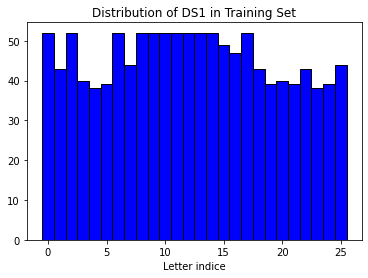

In [101]:
plt.hist(df1[1024], color = 'blue', edgecolor = 'black',
         bins=range(0,27), align='left', rwidth=1)
plt.xlabel('Letter indice')
plt.title('Distribution of DS1 in Training Set')
plt.show()

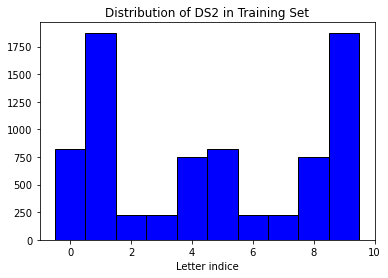

In [103]:
df2 = pd.read_csv('train_2.csv', header=None)
plt.hist(df2[1024], color = 'blue', edgecolor = 'black',
         bins=range(0,11), align='left', rwidth=1)
plt.xlabel('Letter indice')
plt.title('Distribution of DS2 in Training Set')
plt.show()

## Gaussian Naive Bayes Classifier

C:\Users\berna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


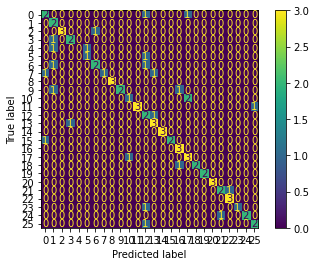

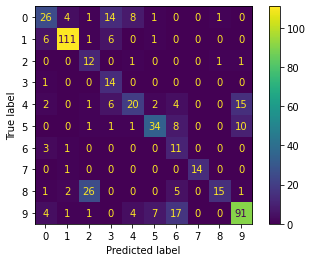

In [106]:
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
#Creating the model
gnb1 = GaussianNB()
gnb2 = GaussianNB()

#Setting up the data
labels1 = df1[1024]
features1 = df1.iloc[:,:-1]
labels2 = df2[1024]
features2 = df2.iloc[:,:-1]

#Training the model
modelGBN1 = gnb1.fit(features1, labels1)
modelGBN2 = gnb2.fit(features2, labels2)

#Testing the model
df1TestNoLabel = pd.read_csv('test_no_label_1.csv', header=None)
predictionGNB1 = gnb1.predict(df1TestNoLabel)
pd.DataFrame(predictionGNB1).to_csv("GNB-DS1test.csv")

df2TestNoLabel = pd.read_csv('test_no_label_2.csv', header=None)
predictionGNB2 = gnb2.predict(df2TestNoLabel)
pd.DataFrame(predictionGNB2).to_csv("GNB-DS2test.csv")

#Metrics
df1TestWithLabel = pd.read_csv('test_with_label_1.csv', header=None)
labels1Test = df1TestWithLabel[1024]
confusionMatrix1 = metrics.confusion_matrix(labels1Test, predictionGNB1)

df2TestWithLabel = pd.read_csv('test_with_label_2.csv', header=None)
labels2Test = df2TestWithLabel[1024]
confusionMatrix1 = metrics.confusion_matrix(labels2Test, predictionGNB2)


#Export to csv
testResult = pd.DataFrame(predictionGNB1)
testResult.index = df1TestNoLabel.index 
testResult.to_csv("GNB-DS1test.csv", header=None)
metrics.plot_confusion_matrix(modelGBN1, df1TestWithLabel.iloc[:,:-1], df1TestWithLabel[1024])
metrics.precision_score(df1TestWithLabel[1024], predictionGNB1, average=None)
#metrics.recall_score(df1TestWithLabel[1024], predictionGNB1, average=None)
#metrics.f1_score(df1TestWithLabel[1024], predictionGNB1, average=None)
metrics.accuracy_score(df1TestWithLabel[1024], predictionGNB1)
metrics.f1_score(df1TestWithLabel[1024], predictionGNB1, average='macro')
#metrics.f1_score(df1TestWithLabel[1024], predictionGNB1, average='weighted')


testResult = pd.DataFrame(predictionGNB2)
testResult.index = df2TestNoLabel.index 
testResult.to_csv("GNB-DS2test.csv", header=None)
metrics.plot_confusion_matrix(modelGBN2, df2TestWithLabel.iloc[:,:-1], df2TestWithLabel[1024])

## TO DO
#### Extract metrics to function
#### Output to csv formatting
#### classification_report

## Baseline Decision Tree (Base-DT)

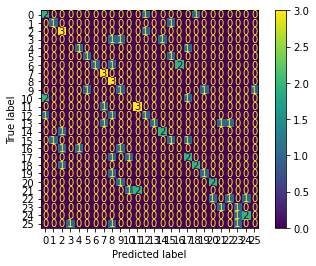

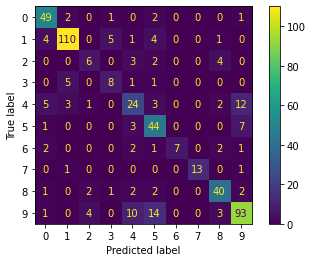

In [107]:
from sklearn.tree import DecisionTreeClassifier
#Creating the model
bdt1 = DecisionTreeClassifier()
bdt2 = DecisionTreeClassifier()

#Setting up the data
labels1 = df1[1024]
features1 = df1.iloc[:,:-1]
labels2 = df2[1024]
features2 = df2.iloc[:,:-1]

#Training the model
modelBDT1 = bdt1.fit(features1, labels1)
modelBDT2 = bdt2.fit(features2, labels2)

#Testing the model
df1TestNoLabel = pd.read_csv('test_no_label_1.csv', header=None)
predictionBDT1 = bdt1.predict(df1TestNoLabel)
pd.DataFrame(predictionBDT1).to_csv("BDT-DS1test.csv")

df2TestNoLabel = pd.read_csv('test_no_label_2.csv', header=None)
predictionBDT2 = bdt2.predict(df2TestNoLabel)
pd.DataFrame(predictionBDT2).to_csv("BDT-DS2test.csv")

#Metrics
df1TestWithLabel = pd.read_csv('test_with_label_1.csv', header=None)
labels1Test = df1TestWithLabel[1024]
confusionMatrix1 = metrics.confusion_matrix(labels1Test, predictionBDT1)

df2TestWithLabel = pd.read_csv('test_with_label_2.csv', header=None)
labels2Test = df2TestWithLabel[1024]
confusionMatrix1 = metrics.confusion_matrix(labels2Test, predictionBDT2)


#Export to csv
testResult = pd.DataFrame(predictionBDT1)
testResult.index = df1TestNoLabel.index 
testResult.to_csv("BDT-DS1test.csv", header=None)
metrics.plot_confusion_matrix(modelBDT1, df1TestWithLabel.iloc[:,:-1], df1TestWithLabel[1024])
metrics.precision_score(df1TestWithLabel[1024], predictionBDT1, average=None)
#metrics.recall_score(df1TestWithLabel[1024], predictionBDT1, average=None)
#metrics.f1_score(df1TestWithLabel[1024], predictionBDT1, average=None)
metrics.accuracy_score(df1TestWithLabel[1024], predictionBDT1)
metrics.f1_score(df1TestWithLabel[1024], predictionBDT1, average='macro')
#metrics.f1_score(df1TestWithLabel[1024], predictionBDT1, average='weighted')


testResult = pd.DataFrame(predictionBDT2)
testResult.index = df2TestNoLabel.index 
testResult.to_csv("BDT-DS2test.csv", header=None)
metrics.plot_confusion_matrix(modelBDT2, df2TestWithLabel.iloc[:,:-1], df2TestWithLabel[1024])

## Best Decision Tree (Best-DT)

## Perceptron (PER)

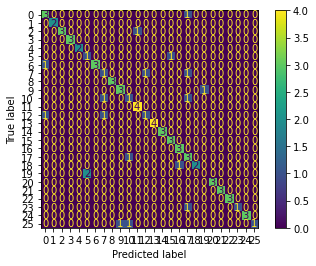

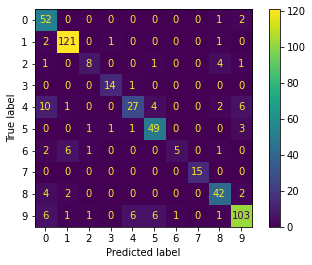

In [108]:
>>> from sklearn.linear_model import Perceptron

#Creating the model
per1 = Perceptron()
per2 = Perceptron()

#Setting up the data
labels1 = df1[1024]
features1 = df1.iloc[:,:-1]
labels2 = df2[1024]
features2 = df2.iloc[:,:-1]

#Training the model
modelPER1 = per1.fit(features1, labels1)
modelPER2 = per2.fit(features2, labels2)

#Testing the model
df1TestNoLabel = pd.read_csv('test_no_label_1.csv', header=None)
predictionPER1 = per1.predict(df1TestNoLabel)
pd.DataFrame(predictionPER1).to_csv("PER-DS1test.csv")

df2TestNoLabel = pd.read_csv('test_no_label_2.csv', header=None)
predictionPER2 = per2.predict(df2TestNoLabel)
pd.DataFrame(predictionPER2).to_csv("PER-DS2test.csv")

#Metrics
df1TestWithLabel = pd.read_csv('test_with_label_1.csv', header=None)
labels1Test = df1TestWithLabel[1024]
confusionMatrix1 = metrics.confusion_matrix(labels1Test, predictionPER1)

df2TestWithLabel = pd.read_csv('test_with_label_2.csv', header=None)
labels2Test = df2TestWithLabel[1024]
confusionMatrix1 = metrics.confusion_matrix(labels2Test, predictionPER2)


#Export to csv
testResult = pd.DataFrame(predictionPER1)
testResult.index = df1TestNoLabel.index 
testResult.to_csv("PER-DS1test.csv", header=None)
metrics.plot_confusion_matrix(modelPER1, df1TestWithLabel.iloc[:,:-1], df1TestWithLabel[1024])
metrics.precision_score(df1TestWithLabel[1024], predictionPER1, average=None)
#metrics.recall_score(df1TestWithLabel[1024], predictionPER1, average=None)
#metrics.f1_score(df1TestWithLabel[1024], predictionPER1, average=None)
metrics.accuracy_score(df1TestWithLabel[1024], predictionPER1)
metrics.f1_score(df1TestWithLabel[1024], predictionPER1, average='macro')
#metrics.f1_score(df1TestWithLabel[1024], predictionPER1, average='weighted')


testResult = pd.DataFrame(predictionPER2)
testResult.index = df2TestNoLabel.index 
testResult.to_csv("PER-DS2test.csv", header=None)
metrics.plot_confusion_matrix(modelPER2, df2TestWithLabel.iloc[:,:-1], df2TestWithLabel[1024])

## Baseline Multi-Layered Perceptron (Base-MLP)

C:\Users\berna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\berna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\berna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


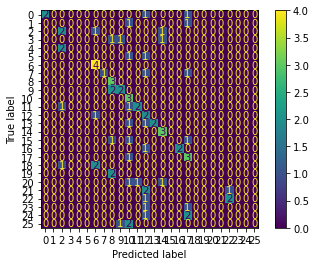

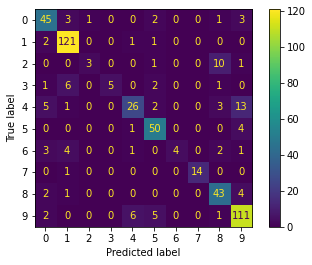

In [109]:
>>> from sklearn.neural_network import MLPClassifier

#Creating the model
basemlp1 = MLPClassifier(activation='logistic', solver='sgd')
basemlp2 = MLPClassifier(activation='logistic', solver='sgd')

#Setting up the data
labels1 = df1[1024]
features1 = df1.iloc[:,:-1]
labels2 = df2[1024]
features2 = df2.iloc[:,:-1]

#Training the model
modelBaseMLP1 = basemlp1.fit(features1, labels1)
modelBaseMLP2 = basemlp2.fit(features2, labels2)

#Testing the model
df1TestNoLabel = pd.read_csv('test_no_label_1.csv', header=None)
predictionBaseMLP1 = basemlp1.predict(df1TestNoLabel)
pd.DataFrame(predictionBaseMLP1).to_csv("BaseMLP-DS1test.csv")

df2TestNoLabel = pd.read_csv('test_no_label_2.csv', header=None)
predictionBaseMLP2 = basemlp2.predict(df2TestNoLabel)
pd.DataFrame(predictionBaseMLP2).to_csv("BaseMLP-DS2test.csv")

#Metrics
df1TestWithLabel = pd.read_csv('test_with_label_1.csv', header=None)
labels1Test = df1TestWithLabel[1024]
confusionMatrix1 = metrics.confusion_matrix(labels1Test, predictionBaseMLP1)

df2TestWithLabel = pd.read_csv('test_with_label_2.csv', header=None)
labels2Test = df2TestWithLabel[1024]
confusionMatrix1 = metrics.confusion_matrix(labels2Test, predictionBaseMLP2)


#Export to csv
testResult = pd.DataFrame(predictionBaseMLP1)
testResult.index = df1TestNoLabel.index 
testResult.to_csv("Base-MLP-DS1test.csv", header=None)
metrics.plot_confusion_matrix(modelBaseMLP1, df1TestWithLabel.iloc[:,:-1], df1TestWithLabel[1024])
metrics.precision_score(df1TestWithLabel[1024], predictionBaseMLP1, average=None)
#metrics.recall_score(df1TestWithLabel[1024], predictionBaseMLP1, average=None)
#metrics.f1_score(df1TestWithLabel[1024], predictionBaseMLP1, average=None)
metrics.accuracy_score(df1TestWithLabel[1024], predictionBaseMLP1)
metrics.f1_score(df1TestWithLabel[1024], predictionBaseMLP1, average='macro')
#metrics.f1_score(df1TestWithLabel[1024], predictionBaseMLP1, average='weighted')


testResult = pd.DataFrame(predictionBaseMLP2)
testResult.index = df2TestNoLabel.index 
testResult.to_csv("Base-MLP-DS2test.csv", header=None)
metrics.plot_confusion_matrix(modelBaseMLP2, df2TestWithLabel.iloc[:,:-1], df2TestWithLabel[1024])

## Best Multi-Layered Perceptron (Best-MLP)